<a href="https://colab.research.google.com/github/LongNguyen1984/DeepLearning/blob/master/DataProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pandas import read_csv

dataset = read_csv('drive/My Drive/InvertPhaseLong2.csv', header=0)

               850nm          640nm  ...  Channel 7  Channel 8
count   20665.000000   20665.000000  ...    20665.0    20665.0
mean   817663.068764 -777540.398306  ...        0.0        0.0
std     26649.696060   13677.458630  ...        0.0        0.0
min         0.000000 -823380.000000  ...        0.0        0.0
25%    808706.000000 -785469.000000  ...        0.0        0.0
50%    826957.000000 -773174.000000  ...        0.0        0.0
75%    834737.000000 -767922.000000  ...        0.0        0.0
max    857234.000000 -752898.000000  ...        0.0        0.0

[8 rows x 8 columns]


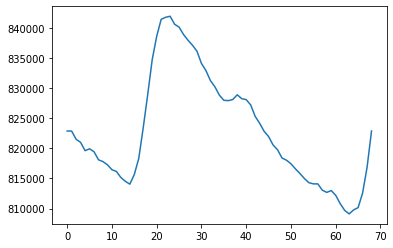

In [2]:
from matplotlib import pyplot

print(dataset.describe())
data = dataset.values
ppg1 = data[:,0]
pyplot.plot(ppg1[1:70])
pyplot.show()

In [ ]:
ppg2 = data[:,0]
pyplot.plot(ppg1[1:70])
pyplot.show()

numpy.ndarray

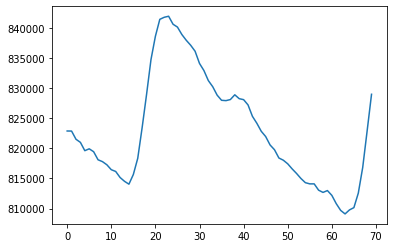

In [254]:
signal = data[:,0]
t = signal[int(1):int(71)];
#a = [x for x in t]
#a = DataFrame.transpose(DataFrame(t))
#s = list()
#s.append(a)
pyplot.plot(t)
type(signal)

# Segment data to N row

In [304]:
from pandas import read_csv
from pandas import DataFrame
import numpy as np

def load_data(filename):
  dataset = read_csv(filename, header=0);
  data = dataset.values;
  return data
def segment_data(signal, distance, overlap):
  i = 1;
  s = list()
  while int(i+distance)<len(signal):
    a = signal[int(i):int(i+distance)];
    #a = [x for x in t]
    #a = DataFrame.transpose(DataFrame(t))
    #a = np.split(a,int(distance-1)
    s.append(a)
    i = i + distance*overlap
    
  return np.asarray(s) # return a nd array

data = load_data('drive/My Drive/InvertPhaseLong2.csv')  
ppg = segment_data(data[:,0],70,0.5)
ppg1 = segment_data(data[:,2],70,0.5)
ppg2 = segment_data(data[:,1],70,0.5)
s1 = ppg # convert to array
s2 = ppg1 # convert to array

In [303]:
ppg2 = np.asarray(ppg)

(589, 70)

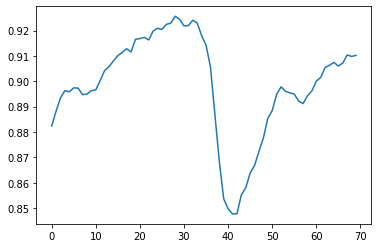

In [104]:
pyplot.plot(X_train[5])
ppg.shape

((589,), (589,))

Prepare Data for Training

In [305]:
# label for first group of Data
y1 = [1]*s1.shape[0];
y2 = [0]*s2.shape[0]
y1 = np.asarray(y1)
y2 = np.asarray(y2)
y1.shape, y2.shape
#ydf1 = DataFrame(y1)
#ydf2 = DataFrame(y2)
# Concatenate data
X = np.concatenate((ppg, ppg1))
y = np.concatenate((y1, y2))
print(X.shape)

# rescale data
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
Xscaled = scaler.fit_transform(X)
Xscaled2 = scaler.fit_transform(ppg2)

(1178, 70)


In [275]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size=0.33, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
X_val = X_val.reshape((X_val.shape[0],X_val.shape[1],1))
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes= 2)
y_val = to_categorical(y_val, num_classes= 2)

In [274]:
print(sum(y_val==0))

99


(789, 70, 1)


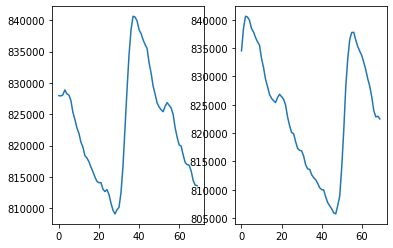

In [261]:
print(X_train.shape)
pyplot.subplot(121)
pyplot.plot(ppg[1])

pyplot.subplot(122)
pyplot.plot(ppg[2])


pyplot.show()

In [7]:
# convert ppg to array
import numpy as np
from pandas import DataFrame


df1= DataFrame(s1)
df2= DataFrame(s2)
print(df1.shape)
print(df2.shape)

NameError: ignored

In [12]:
# check correlate
from pandas import Series

t1 = Series(ppg1[302])
t2 = Series(ppg[1])
t1.corr(t2, method='pearson')

-0.8875684805714731

# Tranining the model

Scaler Data

(589, 70)

In [280]:
scaler = MinMaxScaler()
print(scaler.fit(ppg))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [8]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
df1, df2 = ppg, ppg1

scaled1 = scaler.fit_transform(df1)
scaled2 = scaler.fit_transform(df2)

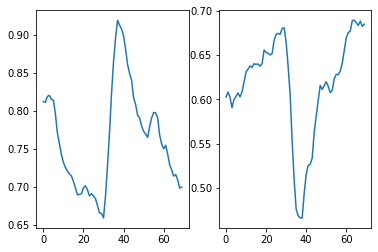

In [11]:
pyplot.subplot(121)
pyplot.plot(scaled1[1])

pyplot.subplot(122)
pyplot.plot(scaled2[302])

In [280]:
scaled1[0].shape, y1.shape

((70, 1), (589,))

In [279]:
# cnn model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

def evaluate_model(trainX, trainy,testX, testy):
  
  model = Sequential()
  n_timesteps = 70
  n_features= 1
  n_outputs=2
  verbose, epochs, batch_size = 0, 10, 32
  model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))
  model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
  model.add(Dropout(0.5))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dense(n_outputs, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  # fit network
  # model.fit(trainX, trainy,  epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
  # _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
  # return accuracy

In [285]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 68, 64)            256       
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 66, 64)            12352     
_________________________________________________________________
dropout_4 (Dropout)          (None, 66, 64)            0         
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 33, 64)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2112)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               211300    
_________________________________________________________________
dense_9 (Dense)              (None, 2)                

In [286]:
verbose, epochs, batch_size = 0, 10, 32
# fit network
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), batch_size=batch_size, verbose=1)

Epoch 1/10
25/25 [==============================] - 0s 4ms/step - loss: 2.1515e-07 - accuracy: 1.0000 - val_loss: 1.7108e-05 - val_accuracy: 1.0000
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 1.6031e-07 - accuracy: 1.0000 - val_loss: 1.6844e-05 - val_accuracy: 1.0000
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 1.7088e-07 - accuracy: 1.0000 - val_loss: 1.6607e-05 - val_accuracy: 1.0000
Epoch 4/10
25/25 [==============================] - 0s 3ms/step - loss: 2.1968e-07 - accuracy: 1.0000 - val_loss: 1.6345e-05 - val_accuracy: 1.0000
Epoch 5/10
25/25 [==============================] - 0s 4ms/step - loss: 1.6726e-07 - accuracy: 1.0000 - val_loss: 1.6054e-05 - val_accuracy: 1.0000
Epoch 6/10
25/25 [==============================] - 0s 4ms/step - loss: 1.6151e-07 - accuracy: 1.0000 - val_loss: 1.5841e-05 - val_accuracy: 1.0000
Epoch 7/10
25/25 [==============================] - 0s 4ms/step - loss: 1.7753e-07 - accuracy: 1.0000 - val_loss

In [277]:
from numpy import mean
from numpy import std
def summarize_results(scores):
	print(scores)
	m, s = mean(scores), std(scores)
	print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))
 
def run_experiment(repeats=10):
	
	# repeat experiment
	scores = list()
	for r in range(repeats):
		score = evaluate_model(X_train, y_train, X_test, y_test)
		score = score * 100.0
		print('>#%d: %.3f' % (r+1, score))
		scores.append(score)
	# summarize results
	summarize_results(scores)
 
# run the experiment
run_experiment()

>#1: 100.000
>#2: 100.000
>#3: 100.000
>#4: 100.000
>#5: 100.000
>#6: 100.000
>#7: 100.000
>#8: 100.000
>#9: 100.000
>#10: 100.000
[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
Accuracy: 100.000% (+/-0.000)


[1. 0.]


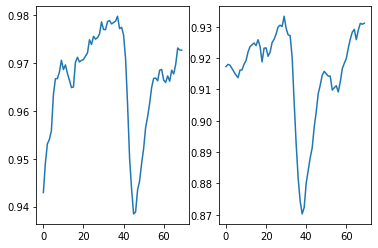

In [309]:
x = X_val[5]
pyplot.subplot(121)
pyplot.plot(x)
print(y_val[6])
pyplot.subplot(122)
pyplot.plot(X_val[6])

[0. 1.]


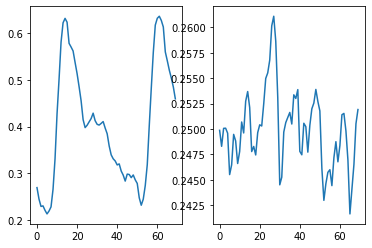

In [322]:
x = Xscaled2[95]
pyplot.subplot(121)
pyplot.plot(x)
print(y_val[60])
pyplot.subplot(122)
pyplot.plot(X_val[60])

In [ ]:
print(y_val)

In [323]:
s = Xscaled2[95].reshape((1,Xscaled2.shape[1],1))
model.predict(s)

array([[0.03811702, 0.96188295]], dtype=float32)